In [46]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [47]:
data=pd.read_csv(r"D:\Jupyter Notebook\Machine learnig\Height-Weight Data.csv")

In [48]:
data.head()

,Height,Weight
0,73.847017,241.893563
1,68.781904,162.310473
2,74.110105,212.740856
3,71.730978,220.042470
4,69.881796,206.349801


In [49]:
data.shape

(3501, 2)

In [50]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3501 entries, 0 to 3500
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Height  3501 non-null   float64
 1   Weight  3501 non-null   float64
dtypes: float64(2)
memory usage: 54.8 KB


In [51]:
data.describe()

,Height,Weight
count,3501.000000,3501.000000
mean,69.024411,186.891258
std,2.858583,19.903132
min,59.380650,65.780000
25%,67.193523,173.896237
50%,69.044211,187.308370
75%,70.976491,200.356448
max,78.998742,269.989698


Text(0.5, 1.0, 'Weight vs Height Scatterplot')

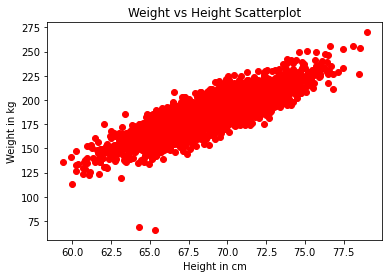

In [52]:
plt.scatter(data.Height,data.Weight,color='red')
plt.xlabel('Height in cm')
plt.ylabel('Weight in kg')
plt.title('Weight vs Height Scatterplot')

In [53]:
data.Height.mean()

69.02441087268797

In [54]:
data.Weight.mean()

186.89125797946284

In [55]:
# import linerar regresion model 
from sklearn.model_selection import train_test_split as tts
from sklearn.linear_model import LinearRegression

In [74]:
X_train,X_valid,y_train,y_valid= tts(data[['Height']],data.Weight,train_size=0.7,random_state=1)


In [75]:
X_valid.head(5)

,Height
719,67.402821
2296,69.560033
3083,65.809912
1296,67.687531
2234,65.077902


In [58]:
X_train.shape

(2450, 1)

In [59]:
X_valid.shape

(1051, 1)

In [60]:
y_train.shape

(2450,)

In [61]:
# impliply the model
lr=LinearRegression()


In [62]:
lr.fit(X_train,y_train)
lr.predict(X_valid)

array([177.07092663, 189.9655512 , 167.54939263, ..., 209.55755027,
       178.6987462 , 204.84854541])

In [63]:
data['predicted Weight']=lr.predict(data[['Height']])
data

,Height,Weight,predicted Weight
0,73.847017,241.893563,215.590782
1,68.781904,162.310473,185.314325
2,74.110105,212.740856,217.163380
3,71.730978,220.042470,202.942268
4,69.881796,206.349801,191.888873
...,...,...,...
3496,69.296830,185.649086,188.392269
3497,70.542201,210.198845,195.836414
3498,73.912549,202.429960,215.982497
3499,67.396021,144.277671,177.030278


In [64]:
X_valid['predicted Weight']=lr.predict(X_valid[['Height']])
X_valid

,Height,predicted Weight
719,67.402821,177.070927
2296,69.560033,189.965551
3083,65.809912,167.549393
1296,67.687531,178.772764
2234,65.077902,163.173840
...,...,...
236,69.867101,191.801037
1125,70.280692,194.273256
1008,72.837685,209.557550
2169,67.675148,178.698746


In [76]:
X_valid

,Height
719,67.402821
2296,69.560033
3083,65.809912
1296,67.687531
2234,65.077902
...,...
236,69.867101
1125,70.280692
1008,72.837685
2169,67.675148


In [71]:
# measure the mean square error
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [78]:
preds=lr.predict(X_valid)
mse=mean_squared_error(y_valid,preds)
mse


110.89221516932378

In [79]:
mae=mean_absolute_error(y_valid,preds)

In [80]:
mae

8.279688660993672

In [85]:
lr.predict([[50]])

array([73.04644308])

Text(0.5, 1.0, 'Height vs Weight plot')

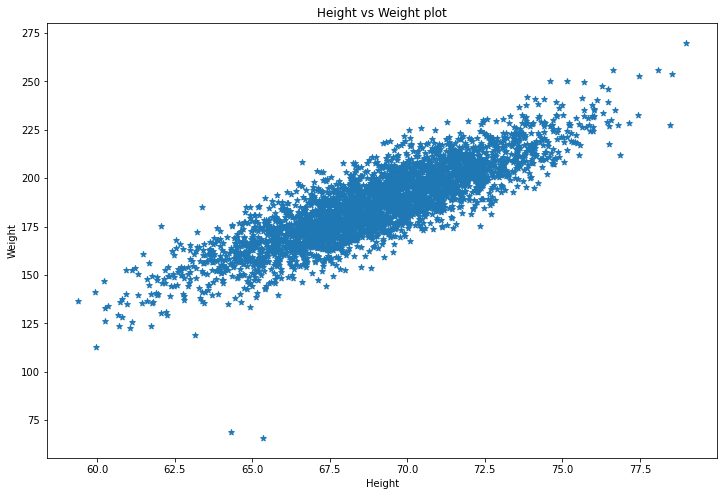

In [90]:
plt.figure(figsize=(12,8))
plt.scatter(data.Height,data.Weight,marker="*")
plt.xlabel('Height')
plt.ylabel('Weight')
plt.title('Height vs Weight plot')

Text(0.5, 1.0, 'Height vs Weight plot')

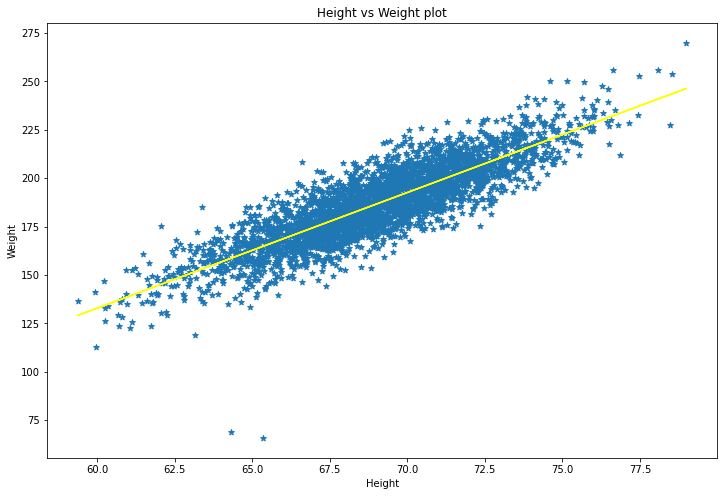

In [92]:
plt.figure(figsize=(12,8))
plt.scatter(data.Height,data.Weight,marker="*")
plt.plot(data.Height,lr.predict(data[['Height']]),color='yellow')
plt.xlabel('Height')
plt.ylabel('Weight')
plt.title('Height vs Weight plot')

In [93]:
lr.score(X_train,y_train)

0.7327243206606744

In [94]:
lr.score(X_valid,y_valid)

0.7313258168853622